# Análise de Dados - Atrasos de Voos

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

In [17]:
df = pd.read_csv('dados_brutos.csv')
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

## Gráfico 1: Matriz de Correlação

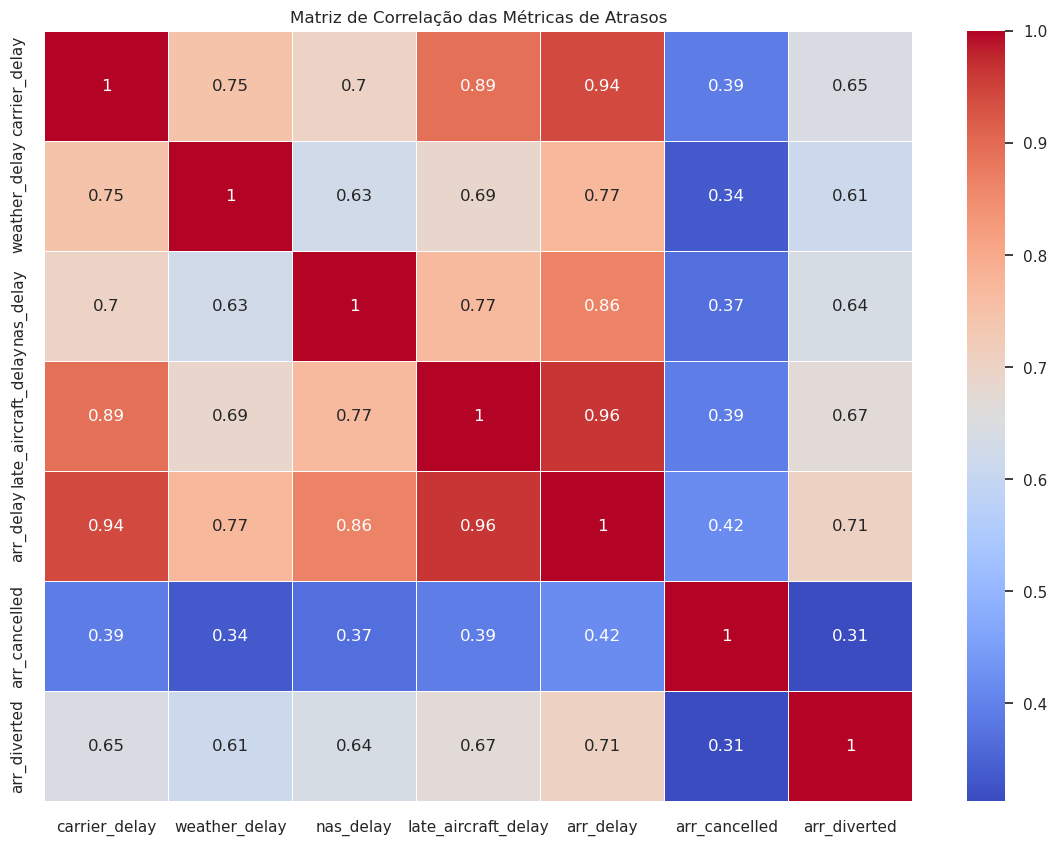

In [ ]:
delay_reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
df_corr = df[delay_reasons + ['arr_delay', 'arr_cancelled', 'arr_diverted']].fillna(df[delay_reasons + ['arr_delay', 'arr_cancelled', 'arr_diverted']].median())

labels_pt = {
    'carrier_delay': 'Atraso Companhia',
    'weather_delay': 'Atraso Meteorológico',
    'nas_delay': 'Atraso NAS',
    'late_aircraft_delay': 'Atraso Aeronave Atrasada',
    'arr_delay': 'Atraso Total',
    'arr_cancelled': 'Voos Cancelados',
    'arr_diverted': 'Voos Desviados'
}

plt.figure(figsize=(14, 10))
corr_matrix = df_corr.corr()
corr_matrix = corr_matrix.rename(columns=labels_pt, index=labels_pt)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação das Métricas de Atrasos')
plt.show()

## Gráfico 2: Atraso Médio por Companhia Aérea

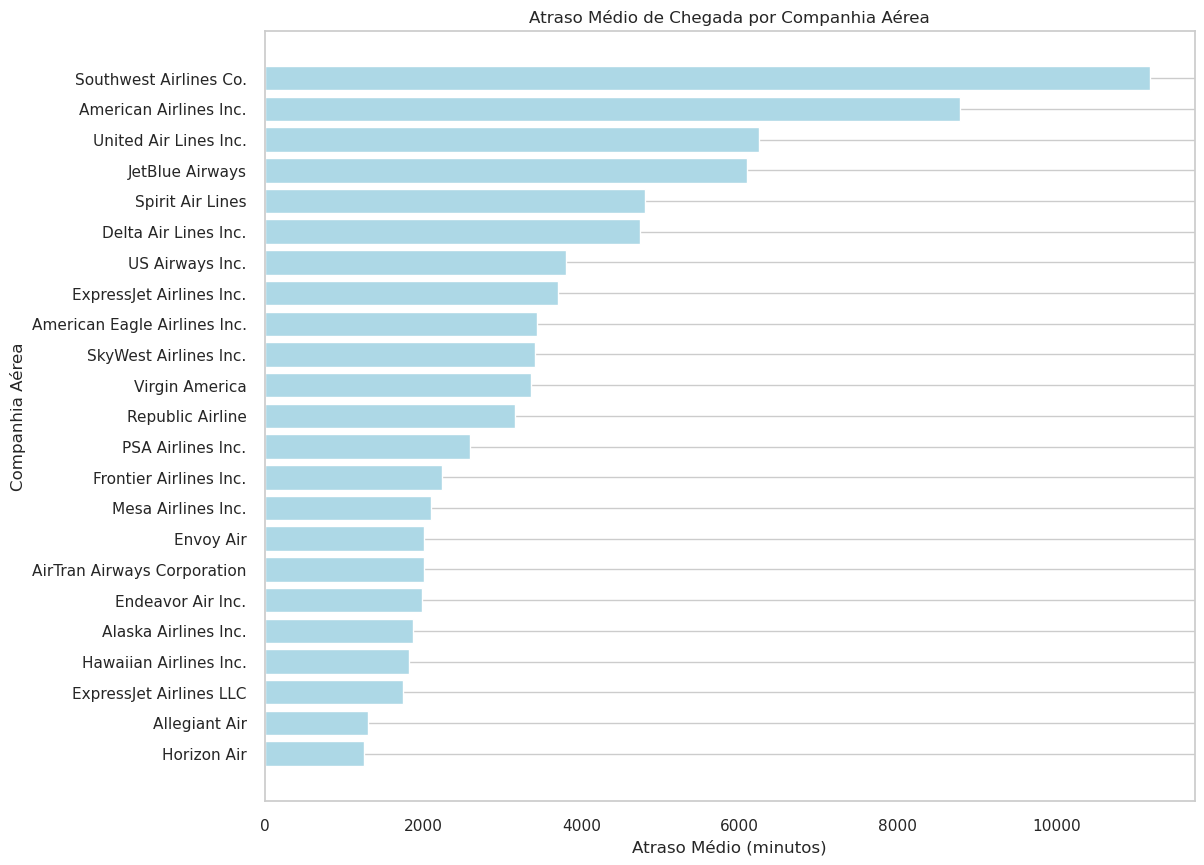

In [19]:
average_delay_per_carrier = df.groupby('carrier_name')['arr_delay'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 10))
plt.barh(average_delay_per_carrier['carrier_name'], average_delay_per_carrier['arr_delay'], color='lightblue')
plt.title('Atraso Médio de Chegada por Companhia Aérea')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Companhia Aérea')
plt.grid(axis='x')
plt.show()

## Gráfico 3: Impacto das Condições Meteorológicas

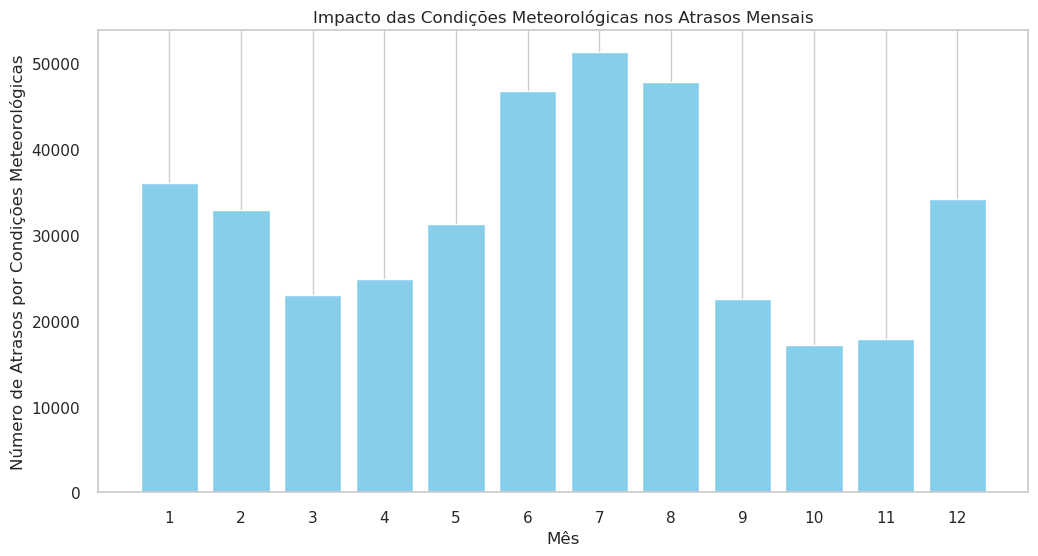

In [20]:
weather_impact = df.groupby(['month'])['weather_ct'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(weather_impact['month'], weather_impact['weather_ct'], color='skyblue')
plt.title("Impacto das Condições Meteorológicas nos Atrasos Mensais")
plt.xlabel("Mês")
plt.ylabel("Número de Atrasos por Condições Meteorológicas")
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

## Gráfico 4: Sazonalidade - Atrasos Mensais por Ano

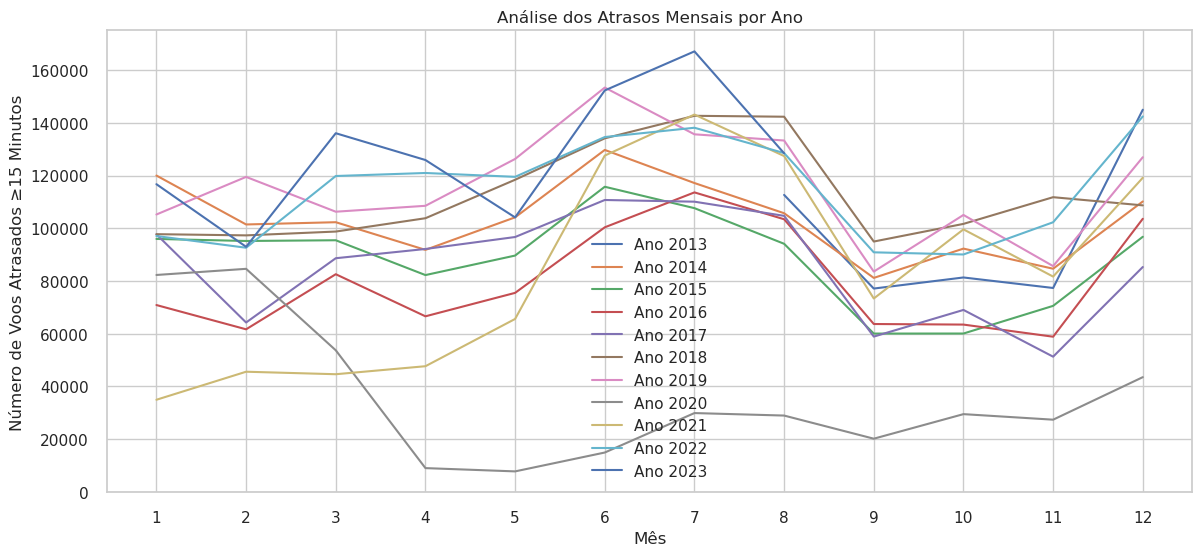

In [21]:
monthly_delays = df.groupby(['year', 'month'])['arr_del15'].sum().reset_index()
plt.figure(figsize=(14, 6))
for year in sorted(monthly_delays['year'].unique()):
    monthly_data = monthly_delays[monthly_delays['year'] == year]
    plt.plot(monthly_data['month'], monthly_data['arr_del15'], label=f'Ano {year}')
plt.title('Análise dos Atrasos Mensais por Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Voos Atrasados ≥15 Minutos')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

## Gráfico 5: Tendência de Atrasos Totais ao Longo do Tempo

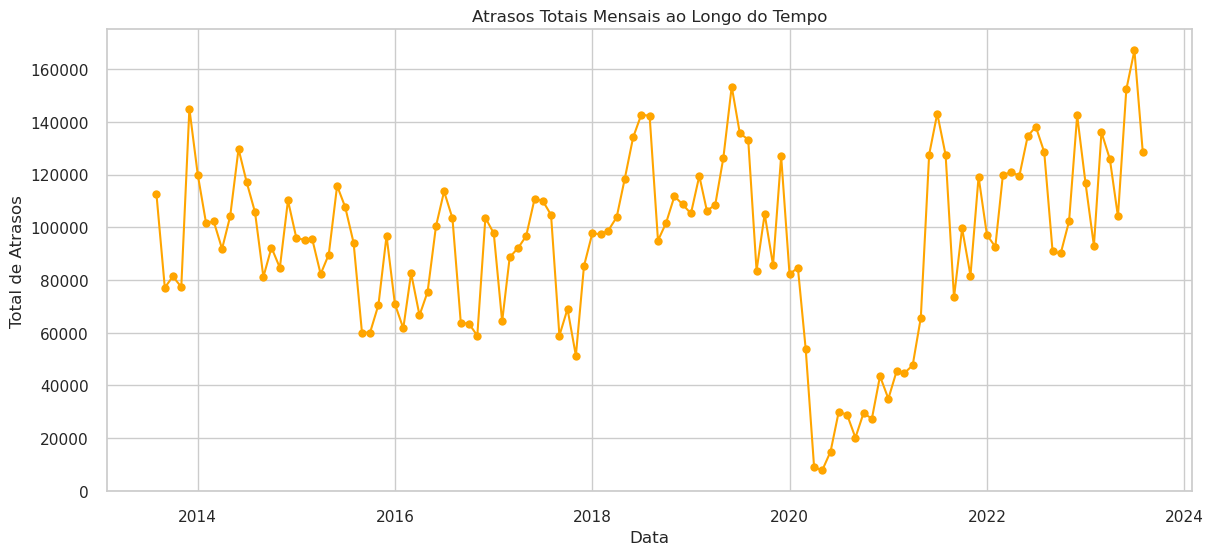

In [22]:
trend_data = df.groupby(['year', 'month'])['arr_del15'].sum().reset_index()
trend_data['date'] = pd.to_datetime(trend_data[['year', 'month']].assign(day=1))
plt.figure(figsize=(14, 6))
plt.plot(trend_data['date'], trend_data['arr_del15'], marker='o', color='orange')
plt.title('Atrasos Totais Mensais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Atrasos')
plt.grid(True)
plt.show()

## Gráfico 6: Razões dos Atrasos (Grid 2x2)

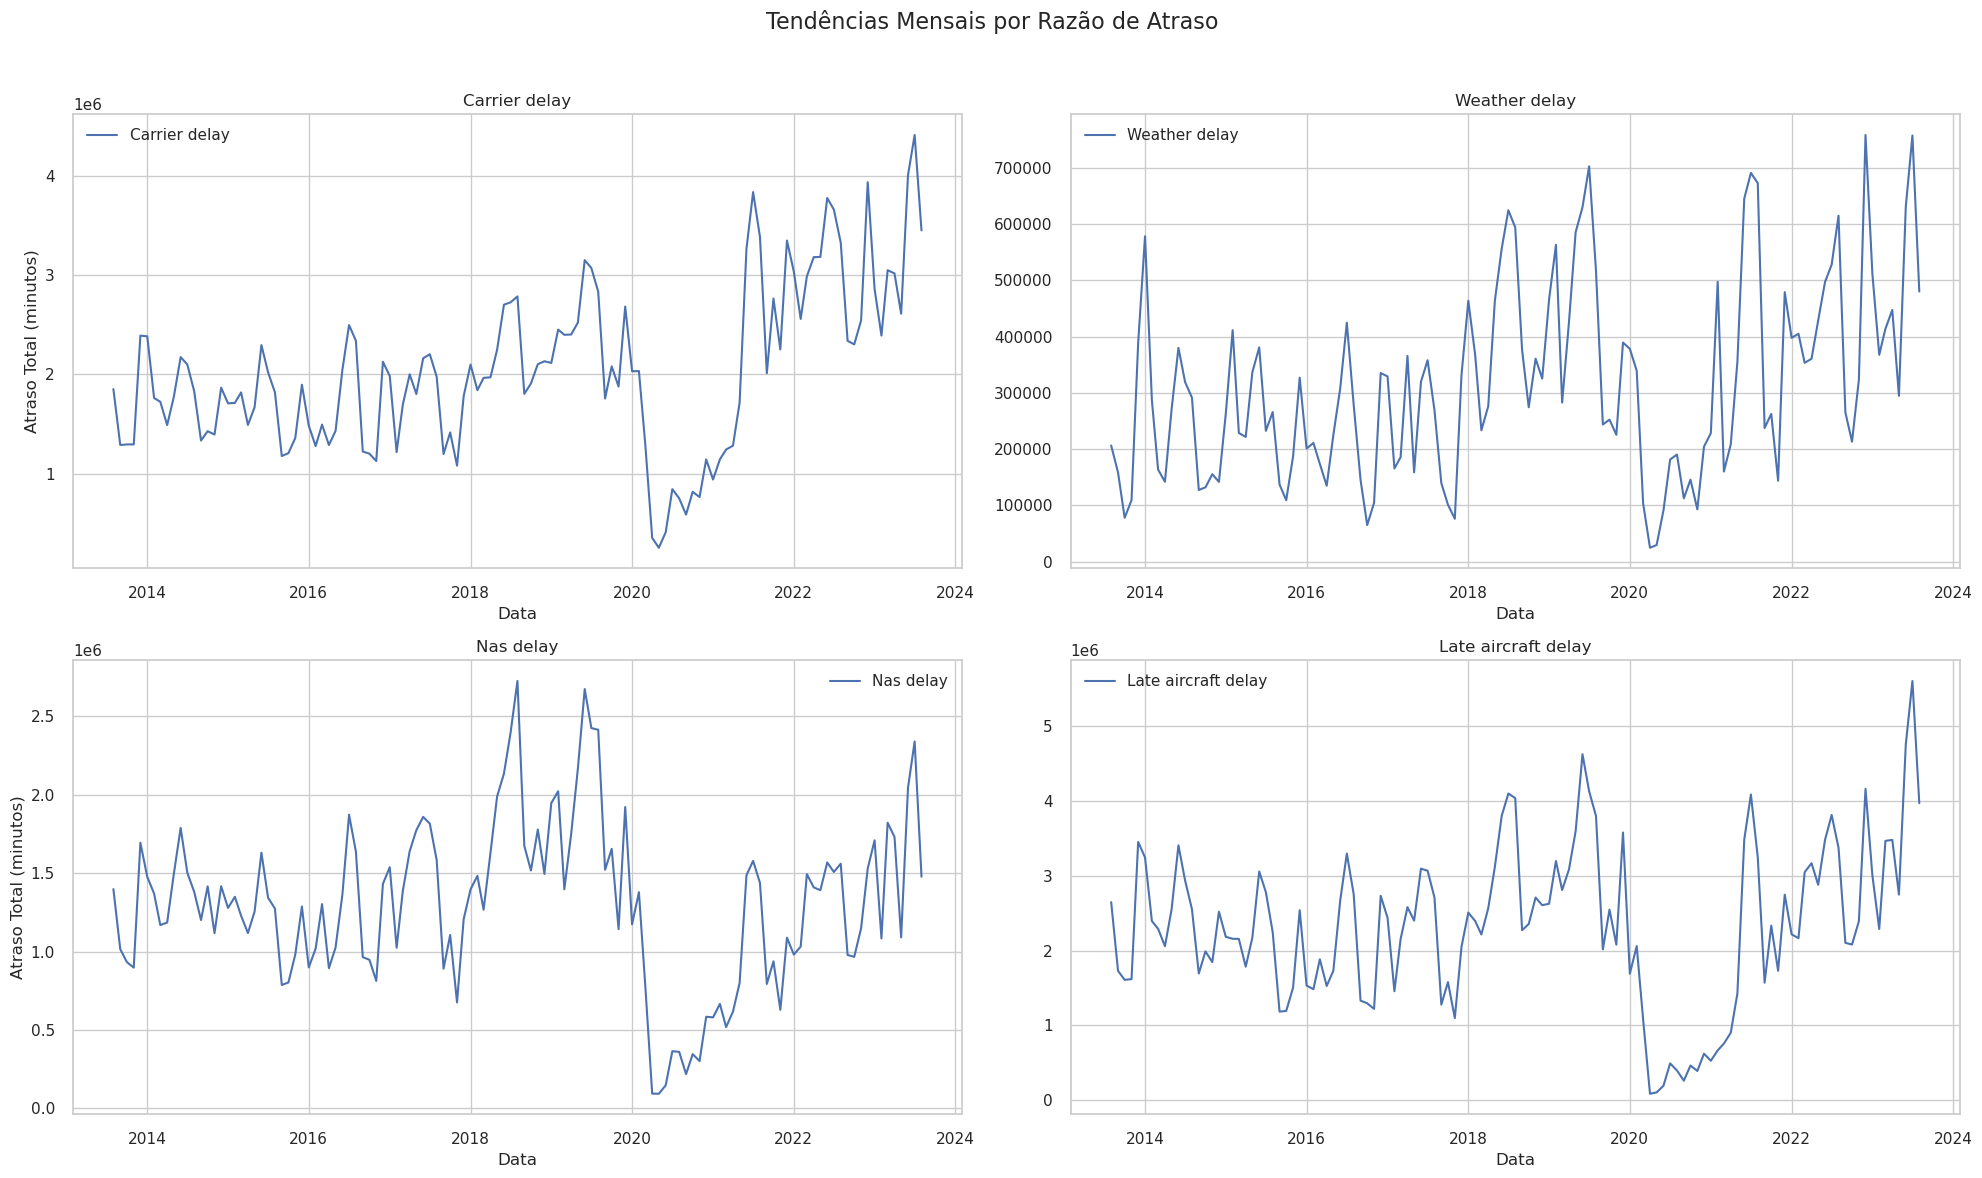

In [ ]:
delay_reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
titles_pt = ['Atraso da Companhia', 'Atraso por Condições Meteorológicas', 'Atraso do Sistema de Aviação Nacional', 'Atraso de Aeronave Atrasada']

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Tendências Mensais por Razão de Atraso', fontsize=16)

for i, (reason, title_pt) in enumerate(zip(delay_reasons[:4], titles_pt)):
    ax = axes[i // 2, i % 2]
    trend_data = df.groupby(['year', 'month'])[reason].sum().reset_index()
    trend_data['date'] = pd.to_datetime(trend_data[['year', 'month']].assign(day=1))
    ax.plot(trend_data['date'], trend_data[reason], label=title_pt)
    ax.set_title(title_pt)
    ax.set_xlabel('Data')
    if i % 2 == 0:
        ax.set_ylabel('Atraso Total (minutos)')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Gráfico 7: Contribuição Média das Causas de Atrasos

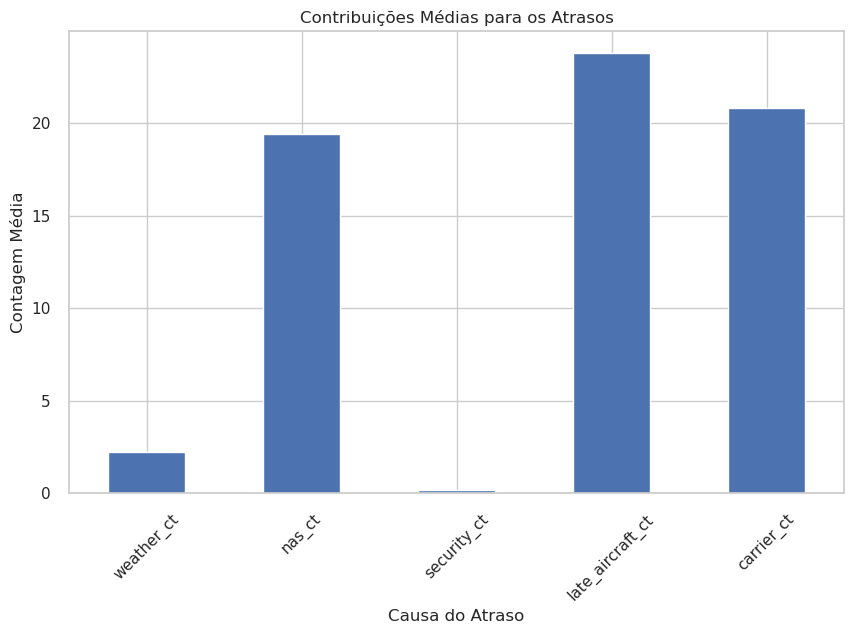

In [24]:
delay_factors = df[['weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'carrier_ct']].mean()
plt.figure(figsize=(10, 6))
delay_factors.plot(kind='bar')
plt.title('Contribuições Médias para os Atrasos')
plt.xlabel('Causa do Atraso')
plt.ylabel('Contagem Média')
plt.xticks(rotation=45)
plt.show()

## Gráfico 8: Distribuição de Features Numéricas

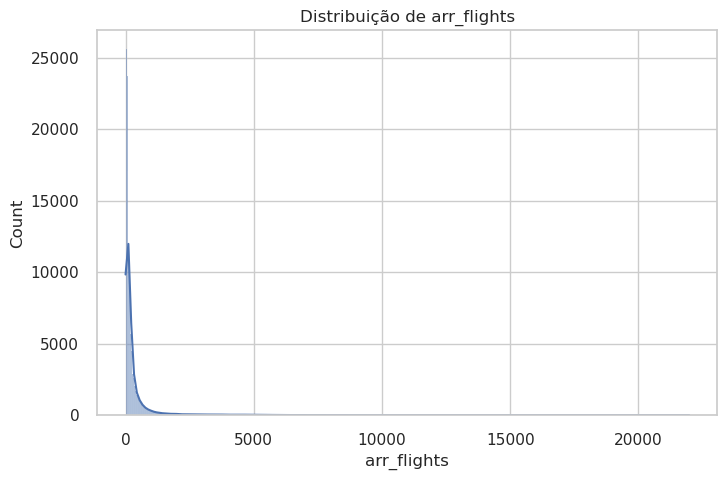

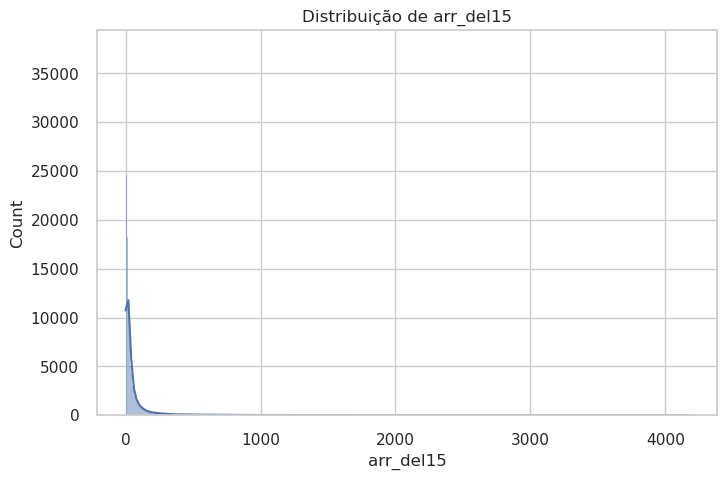

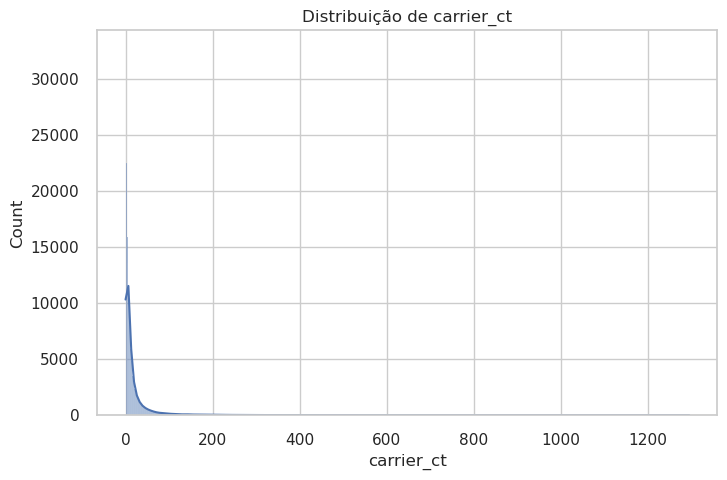

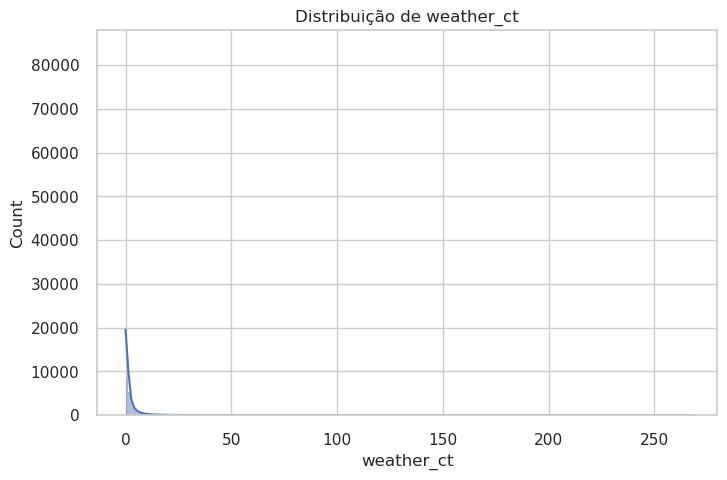

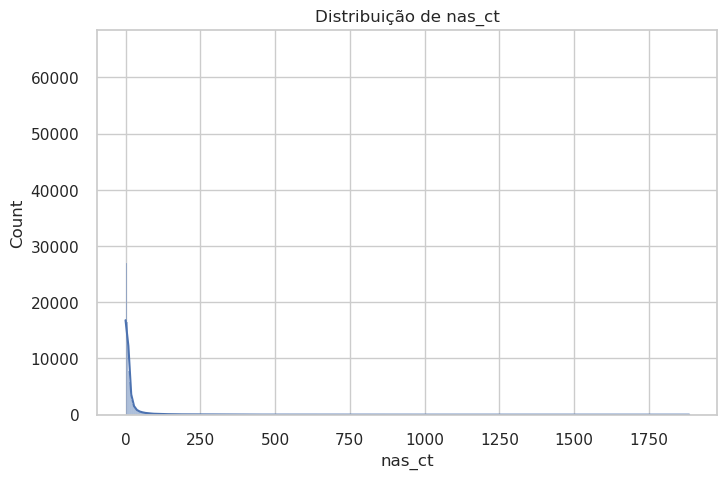

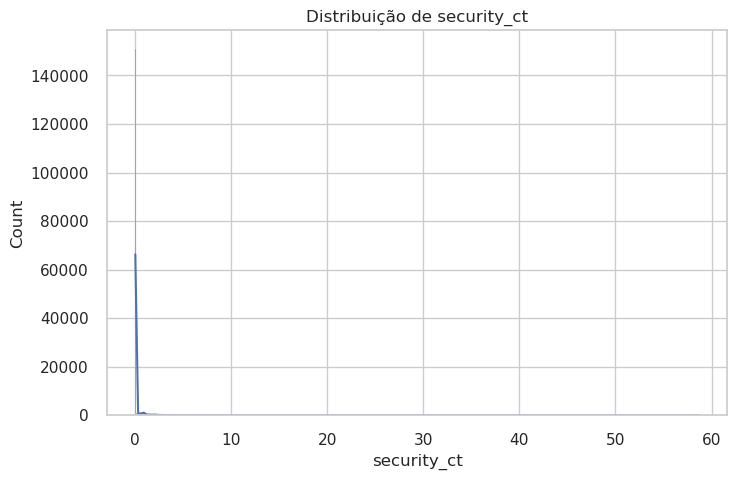

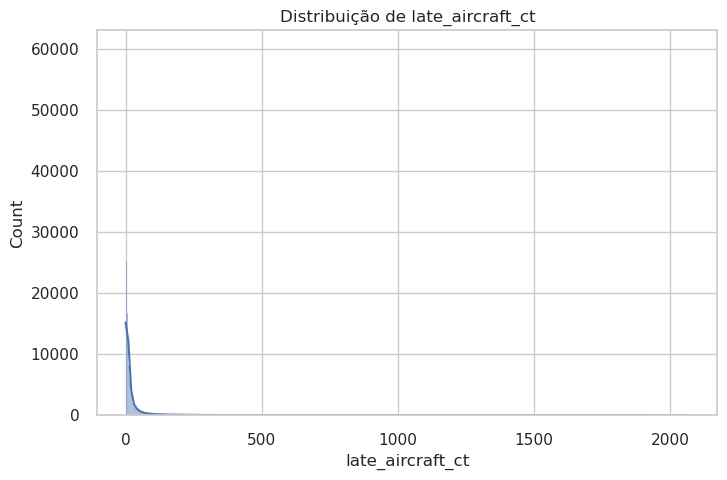

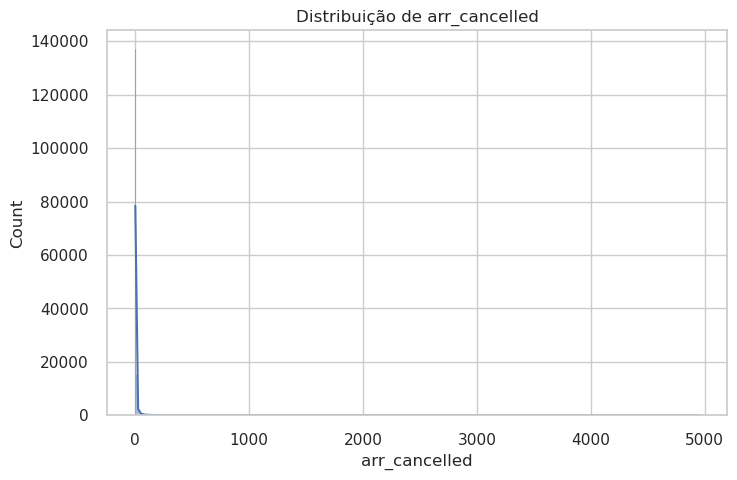

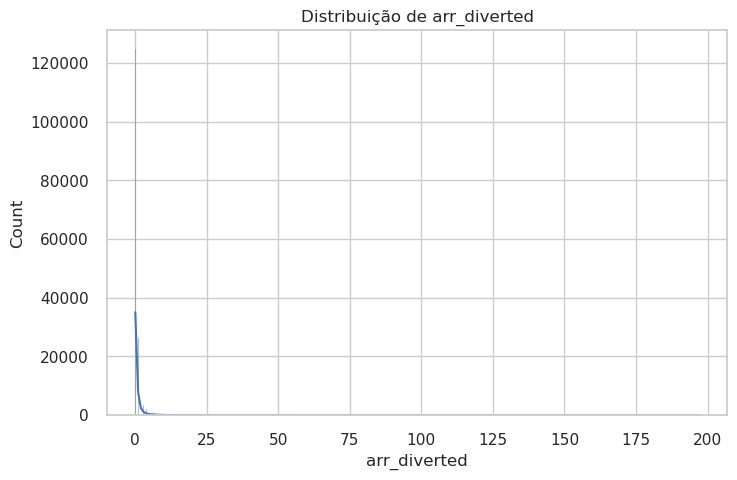

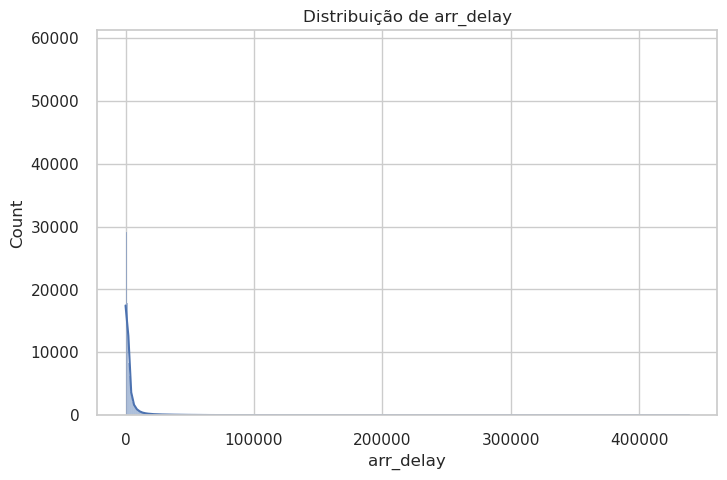

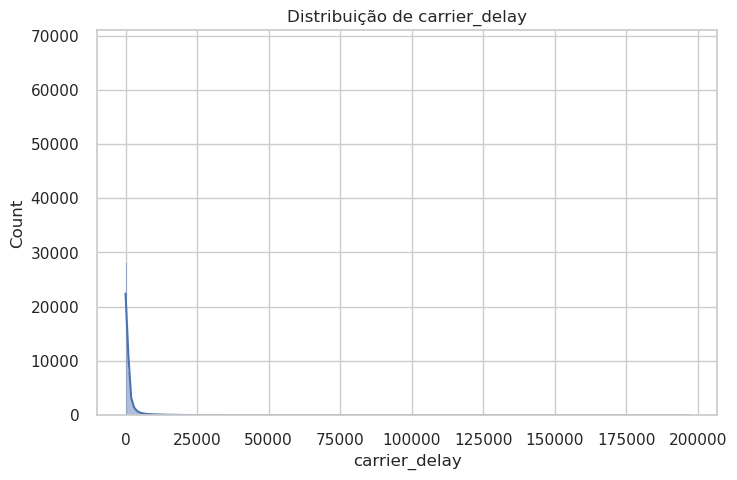

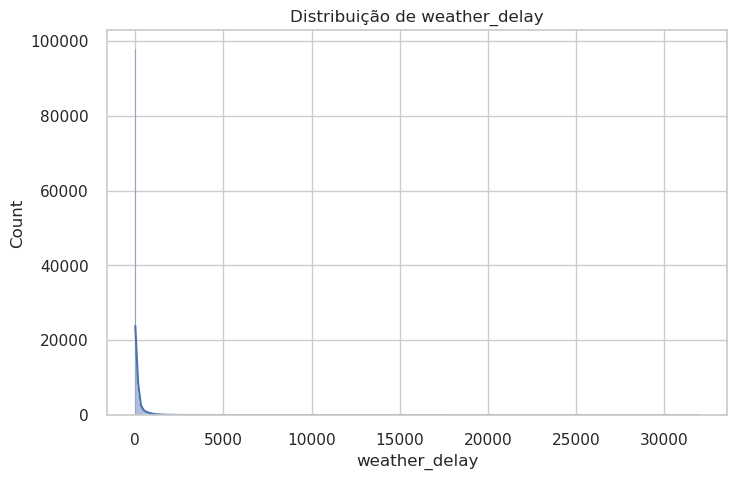

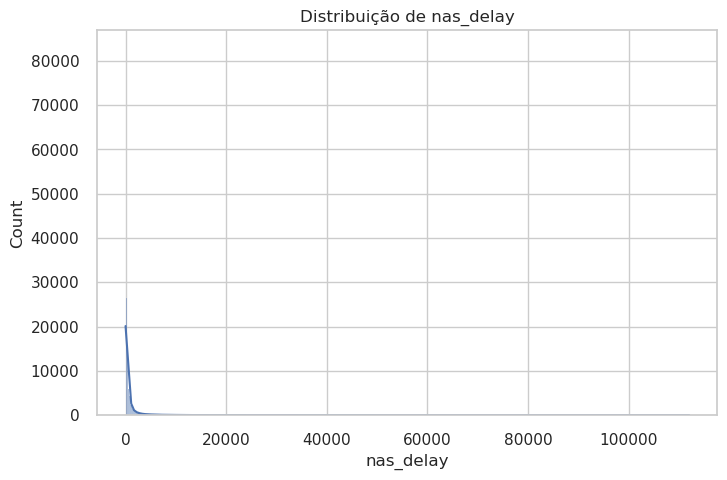

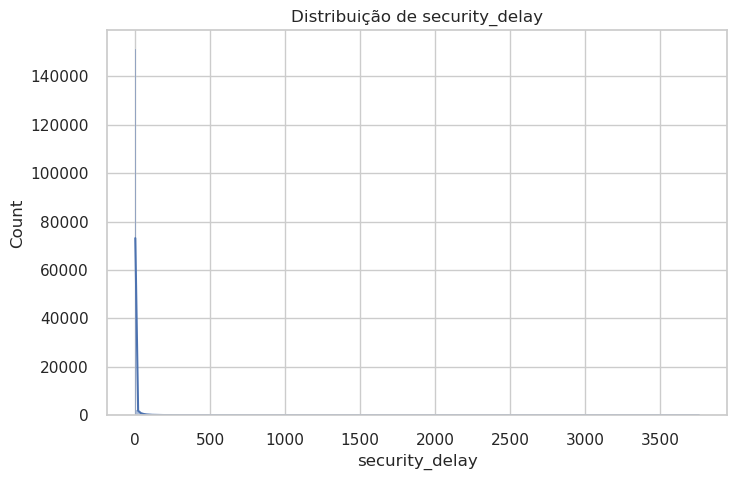

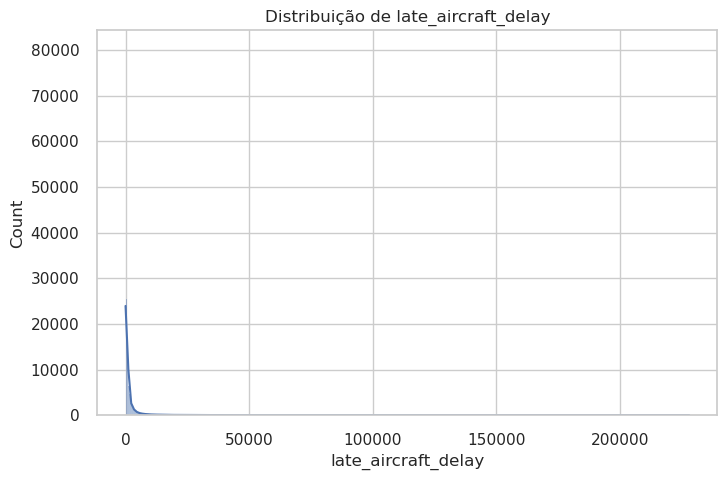

In [ ]:
numeric_features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
                    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                    'security_delay', 'late_aircraft_delay']

feature_names_pt = {
    'arr_flights': 'Voos de Chegada',
    'arr_del15': 'Atrasos ≥15 min',
    'carrier_ct': 'Contagem Atraso Companhia',
    'weather_ct': 'Contagem Atraso Meteorológico',
    'nas_ct': 'Contagem Atraso NAS',
    'security_ct': 'Contagem Atraso Segurança',
    'late_aircraft_ct': 'Contagem Aeronave Atrasada',
    'arr_cancelled': 'Voos Cancelados',
    'arr_diverted': 'Voos Desviados',
    'arr_delay': 'Tempo Total de Atraso',
    'carrier_delay': 'Atraso da Companhia',
    'weather_delay': 'Atraso Meteorológico',
    'nas_delay': 'Atraso NAS',
    'security_delay': 'Atraso de Segurança',
    'late_aircraft_delay': 'Atraso Aeronave Atrasada'
}

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribuição de {feature_names_pt[feature]}')
    plt.xlabel(feature_names_pt[feature])
    plt.ylabel('Frequência')
    plt.show()

## Gráfico 9: Top Features Categóricas

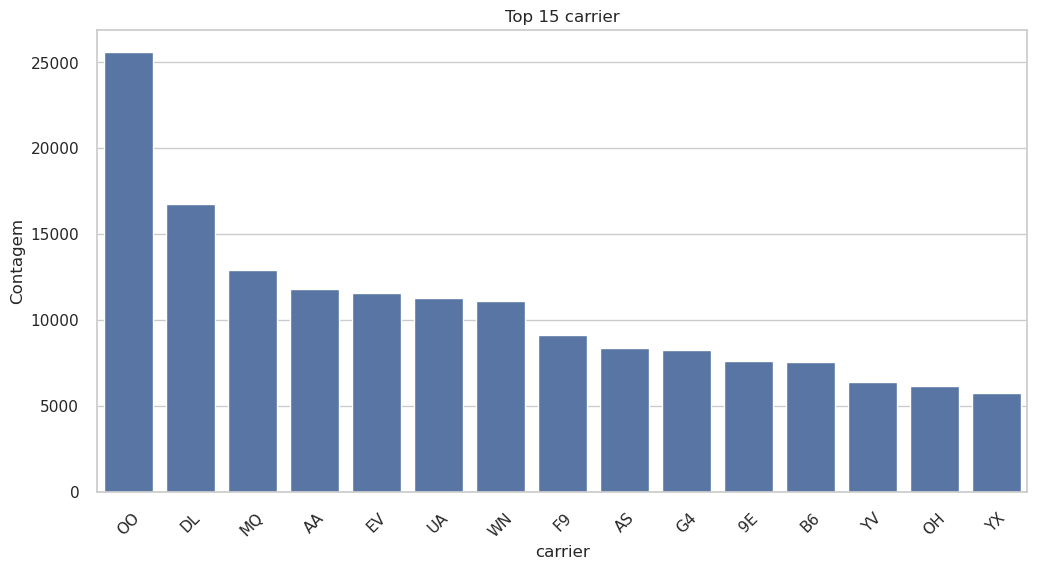

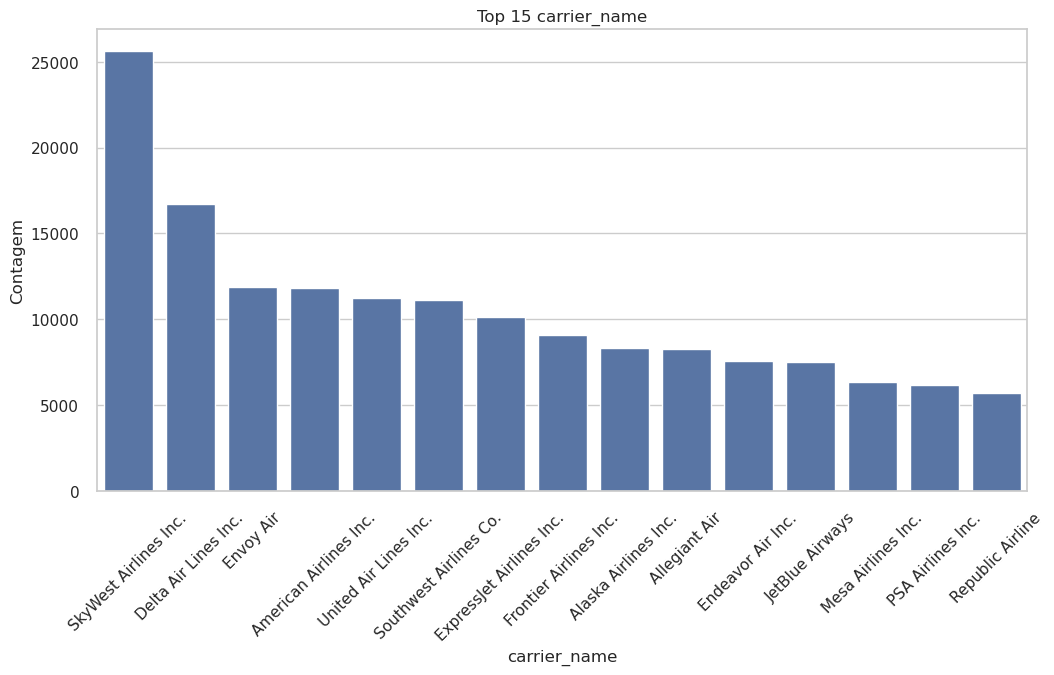

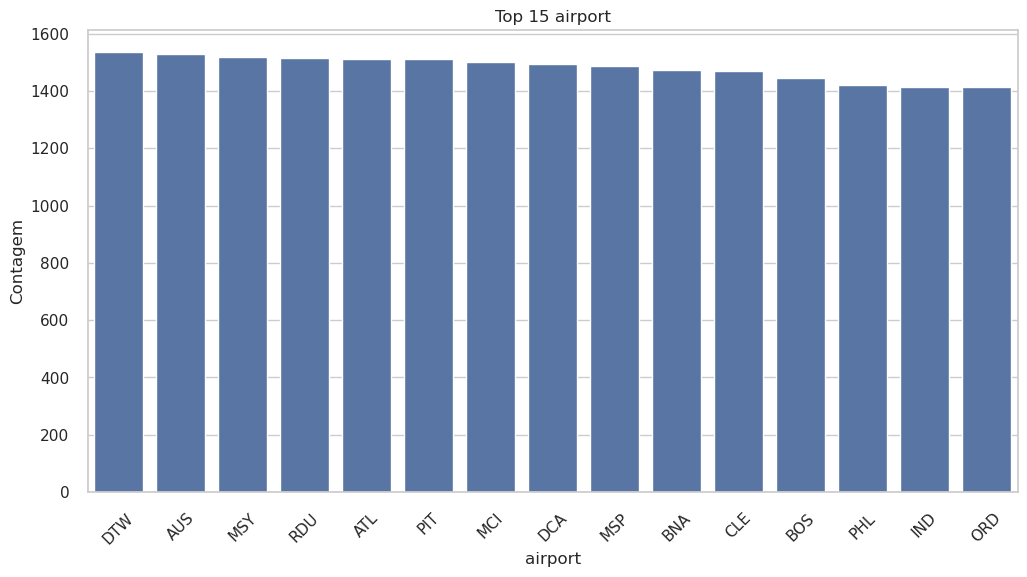

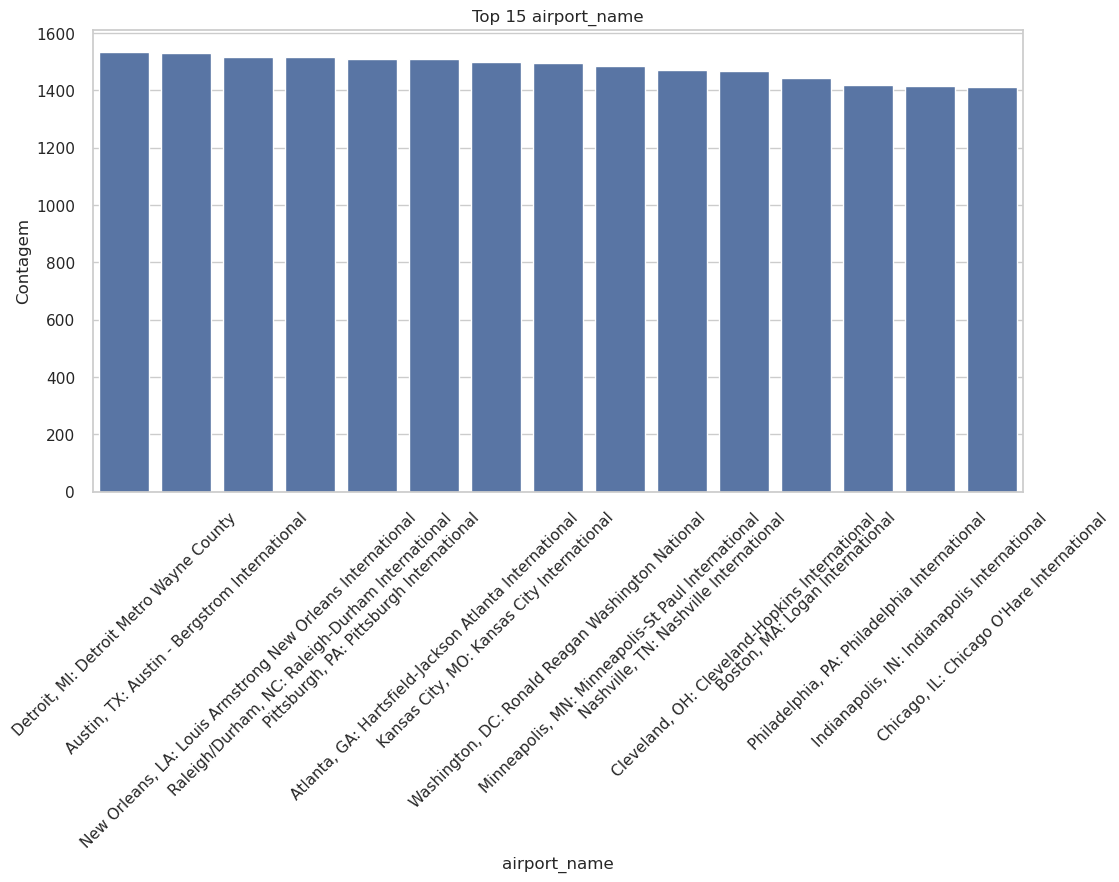

In [ ]:
categorical_features = ['carrier', 'carrier_name', 'airport', 'airport_name']
categorical_names_pt = {
    'carrier': 'Código da Companhia',
    'carrier_name': 'Nome da Companhia',
    'airport': 'Código do Aeroporto',
    'airport_name': 'Nome do Aeroporto'
}

for feature in categorical_features:
    top_categories = df[feature].value_counts().nlargest(15)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top 15 {categorical_names_pt[feature]}')
    plt.xlabel(categorical_names_pt[feature])
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

## Gráfico 10: Tendência de Voos de Chegada ao Longo do Tempo

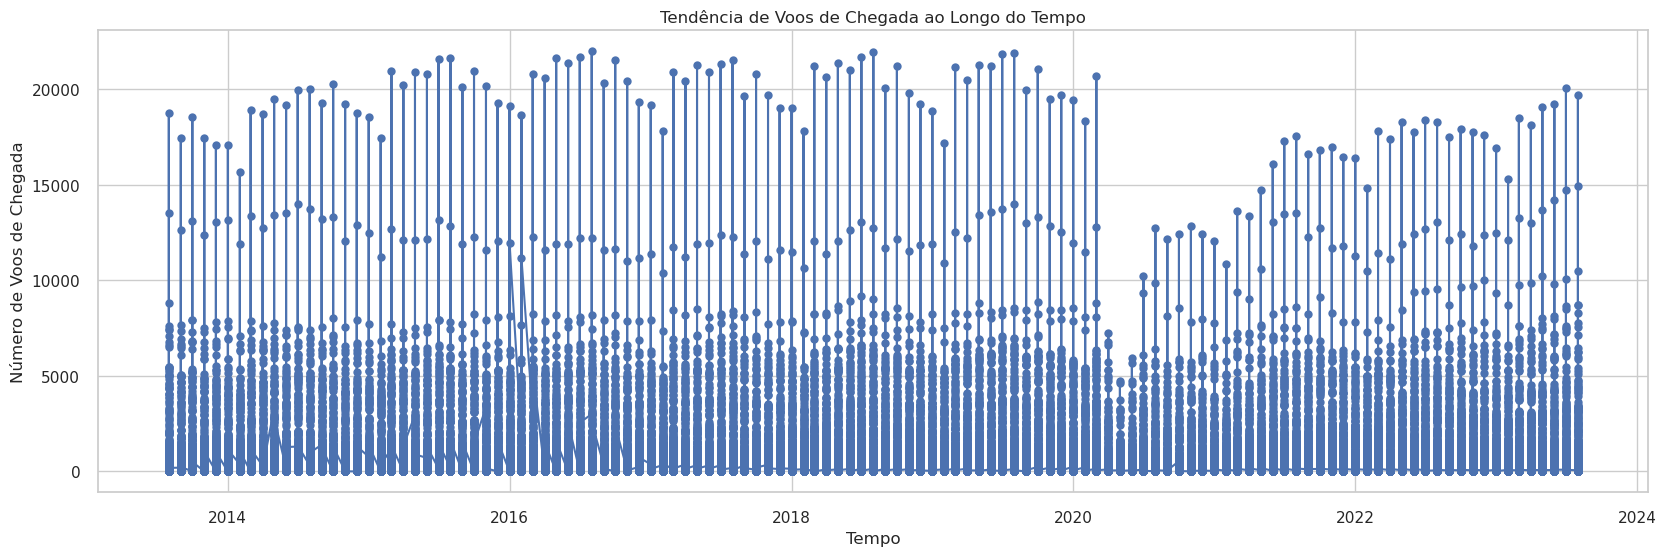

In [27]:
df_temp = df.copy()
df_temp = df_temp.set_index('date')
df_temp['arr_flights'] = df_temp['arr_flights'].fillna(df_temp['arr_flights'].median())

plt.figure(figsize=(20, 6))
plt.plot(df_temp['arr_flights'], marker='o', linestyle='-')
plt.title('Tendência de Voos de Chegada ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Número de Voos de Chegada')
plt.show()

## Gráfico 11: Soma Mensal de Voos de Chegada

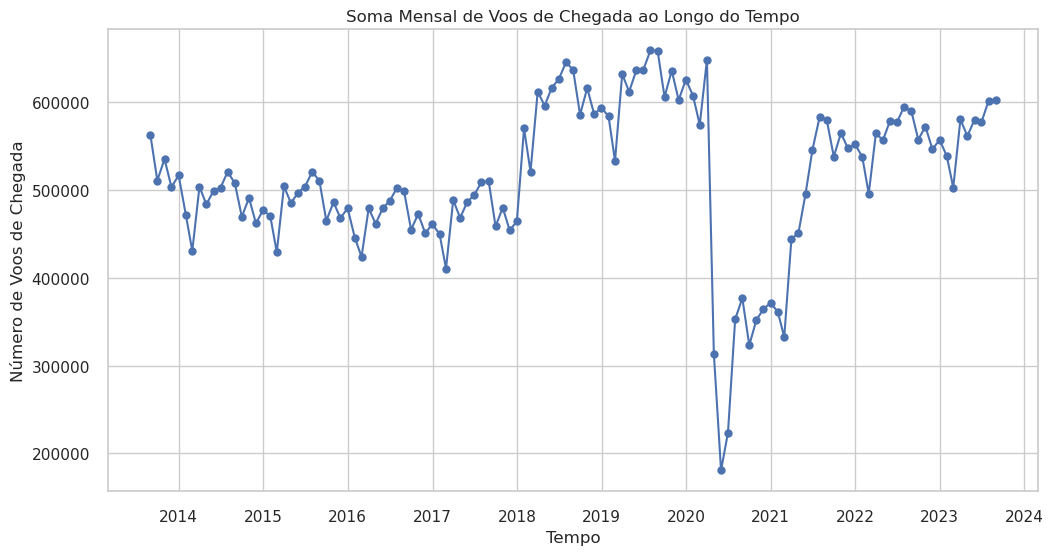

In [28]:
df_temp = df.copy()
df_temp = df_temp.set_index('date')
monthly_df = df_temp.resample('ME').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df['arr_flights'], marker='o', linestyle='-')
plt.title('Soma Mensal de Voos de Chegada ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Número de Voos de Chegada')
plt.show()

## Gráfico 12: Soma Anual de Voos de Chegada

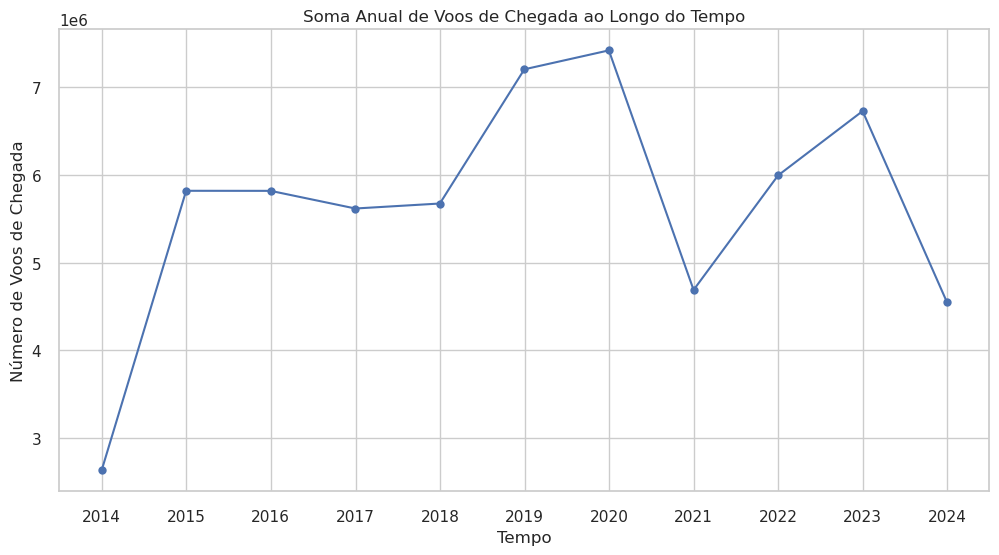

In [29]:
df_temp = df.copy()
df_temp = df_temp.set_index('date')
yearly_df = df_temp.resample('YE').sum()

plt.figure(figsize=(12, 6))
plt.plot(yearly_df['arr_flights'], marker='o', linestyle='-')
plt.title('Soma Anual de Voos de Chegada ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Número de Voos de Chegada')
plt.show()

## Gráfico 13: Decomposição Sazonal

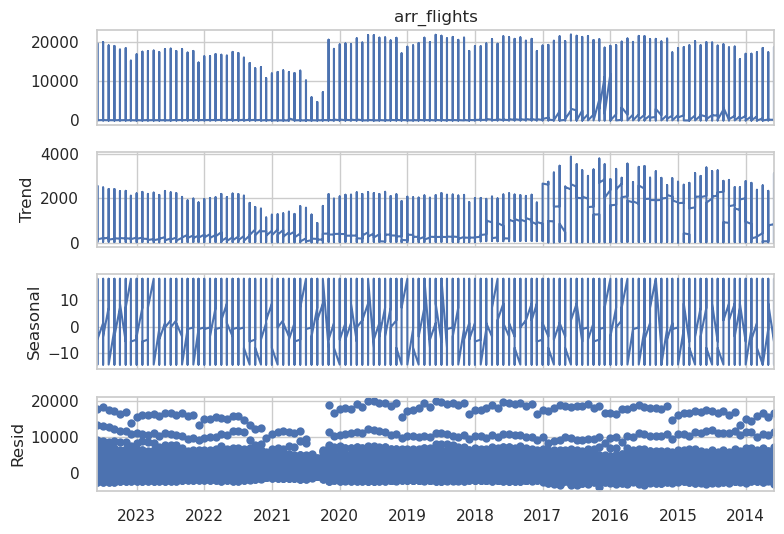

In [ ]:
df_temp = df.copy()
df_temp = df_temp.set_index('date')
df_temp['arr_flights'] = df_temp['arr_flights'].fillna(df_temp['arr_flights'].median())

result = seasonal_decompose(df_temp['arr_flights'], model='additive', period=12)
fig = result.plot()
fig.set_size_inches(12, 8)

# Traduzir os títulos dos subplots
axes = fig.get_axes()
axes[0].set_ylabel('Observado')
axes[1].set_ylabel('Tendência')
axes[2].set_ylabel('Sazonalidade')
axes[3].set_ylabel('Resíduo')

plt.show()